# Understanding Descriptive Statistics

Import the necessary libraries here:

In [229]:
# Libraries
import numpy as np
import pandas as pd
import random 
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [230]:
# your code here

results = random.choices(range(1, 7), k=10)

dice_df = pd.DataFrame({'Roll': range(1, 11), 'Result': results})

In [231]:
display(dice_df)

,Roll,Result
0,1,5
1,2,6
2,3,1
3,4,4
4,5,1
5,6,4
6,7,3
7,8,2
8,9,4
9,10,3


#### 2.- Plot the results sorted by value.

In [232]:
dice_asc = dice_df.sort_values('Result')
dice_asc

,Roll,Result
2,3,1
4,5,1
7,8,2
6,7,3
9,10,3
3,4,4
5,6,4
8,9,4
0,1,5
1,2,6


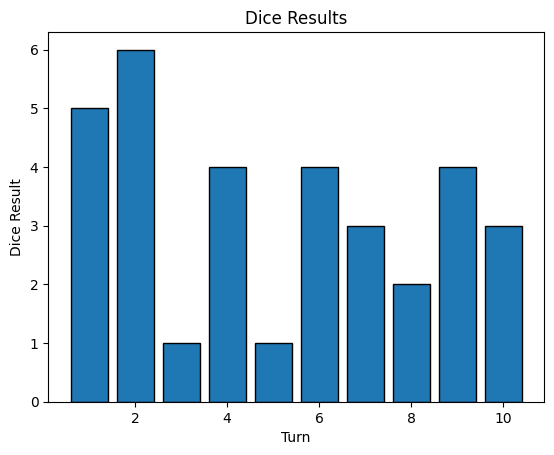

In [233]:
# your code here
plt.title('Dice Results')
plt.bar(dice_asc['Roll'],height=dice_asc['Result'], edgecolor='black')
plt.ylabel('Dice Result')
plt.xlabel('Turn')
plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [234]:
# your code here
freq_dist = dice_asc['Result'].value_counts().sort_index()
freq_dist

Result
1    2
2    1
3    2
4    3
5    1
6    1
Name: count, dtype: int64

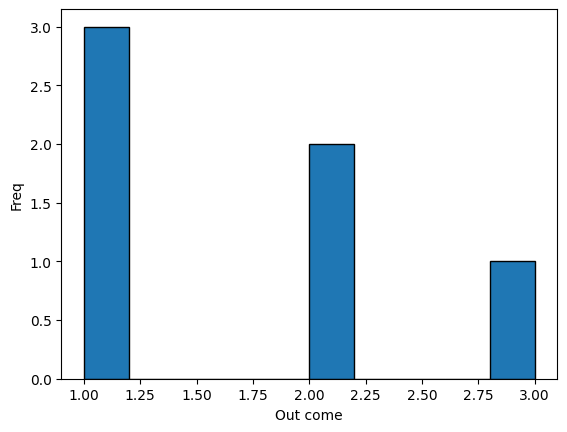

In [235]:
plt.hist(freq_dist, edgecolor='black')
plt.xlabel('Out come')
plt.ylabel('Freq')
plt.show()

In [236]:
"""
did each number have a frequency of 2, i guess each number based on that appears 2 times in 10
"""


'\ndid each number have a frequency of 2, i guess each number based on that appears 2 times in 10\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [237]:
# your code here
def calculate_mean(df):
    if len(df) == 0:
        return None
    observation_sum = 0
    
    for result in df:
        observation_sum += result
        
    mean = observation_sum / len(df)
    
    return mean
calculate_mean(dice_asc['Result'])

3.3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [238]:
# your code here
mean_by_freq = freq_dist.sum() / len(dice_asc['Roll'])
mean_by_freq

1.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [239]:
# your code here
def calculate_median(df):
    
    if len(df) == 0:
        return None
    
    sorted_df = sorted(df)
    
    middle_index = len(sorted_df) // 2
    
    if len(sorted_df) % 2 == 1:
        median = sorted_df[middle_index]
    else:
        median = (sorted_df[middle_index - 1] + sorted_df[middle_index]) / 2
    
    return median
calculate_median(dice_asc['Result'])

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [240]:
# your code here

def calculate_quartiles(df):
    
    if len(df) == 0:
        return None

    sorted_data = sorted(df)
    tamanho = len(sorted_data)
    
    q2 = calculate_median(sorted_data)

    if tamanho % 2 == 0:
        lower_half = sorted_data[:tamanho // 2]
        upper_half = sorted_data[tamanho // 2:]
    else:
        lower_half = sorted_data[:tamanho // 2]
        upper_half = sorted_data[tamanho // 2 + 1:]

    q1 = calculate_median(lower_half)
    q3 = calculate_median(upper_half)

    return q1, q2, q3

calculate_quartiles(dice_asc['Result'])

(2, 3.5, 4)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [241]:
# your code here
hundred_dice = pd.read_csv('../data/roll_the_dice_hundred.csv')
hundred_dice.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [242]:
"""
same random dice trew 100 times!
"""

'\nsame random dice trew 100 times!\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [243]:
# your code here
calculate_mean(hundred_dice['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [244]:
# your code here
freq_hundred = hundred_dice['value'].value_counts().sort_index()
freq_hundred

value
1    12
2    17
3    14
4    22
5    12
6    23
Name: count, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

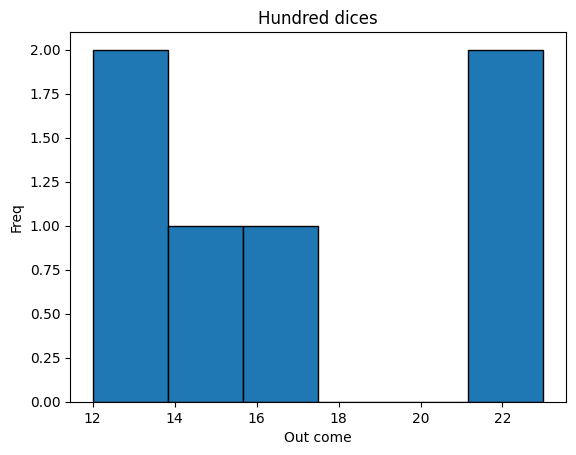

In [245]:
plt.hist(freq_hundred, bins=len(freq_hundred), edgecolor='black')
plt.xlabel('Out come')
plt.ylabel('Freq')
plt.title('Hundred dices')
plt.show()

In [246]:
"""
i See that the frequency of appearance have much more diference from the first time. when trew 10 times.
"""

'\ni See that the frequency of appearance have much more diference from the first time. when trew 10 times.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [247]:
# your code here
thousand_dice = pd.read_csv('../data/roll_the_dice_hundred.csv')
thousand_dice.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [248]:
freq_thousand = thousand_dice.value_counts().sort_index()
freq_thousand

Unnamed: 0  roll  value
0           0     1        1
1           1     2        1
2           2     6        1
3           3     1        1
4           4     6        1
5           5     5        1
6           6     2        1
7           7     2        1
8           8     4        1
9           9     1        1
10          10    5        1
11          11    6        1
12          12    5        1
13          13    4        1
14          14    5        1
15          15    4        1
16          16    4        1
17          17    6        1
18          18    2        1
19          19    4        1
20          20    4        1
21          21    6        1
22          22    3        1
23          23    6        1
24          24    6        1
25          25    4        1
26          26    1        1
27          27    4        1
28          28    4        1
29          29    2        1
30          30    6        1
31          31    5        1
32          32    5        1
33          33    2

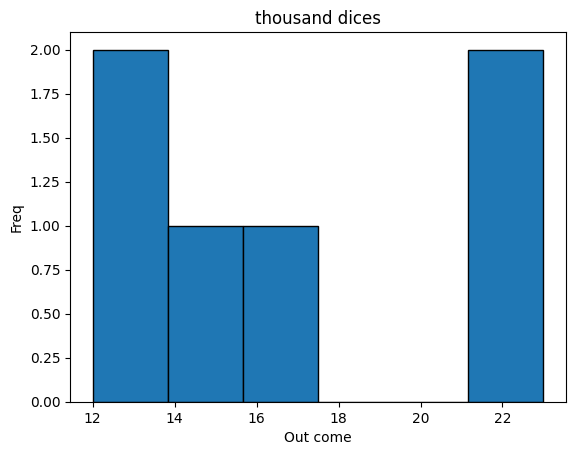

In [249]:
freq_thousand = thousand_dice['value'].value_counts().sort_index()
plt.hist(freq_thousand,bins=len(freq_thousand),edgecolor='black')
plt.xlabel('Out come')
plt.ylabel('Freq')
plt.title('thousand dices')
plt.show()

In [250]:
"""
I see here that is really similar with the hundred dice, 
i guess bigger the amount of trows more similar is the plot will be! the variability is not so big.
"""

'\nI see here that is really similar with the hundred dice, \ni guess bigger the amount of trows more similar is the plot will be! the variability is not so big.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [251]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv')
ages_population.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [252]:
freq_ages = ages_population['observation'].value_counts().sort_index()
freq_ages1 = pd.DataFrame(freq_ages).reset_index()
freq_ages1.head()


,observation,count
0,1.0,2
1,2.0,2
2,4.0,1
3,5.0,2
4,6.0,2


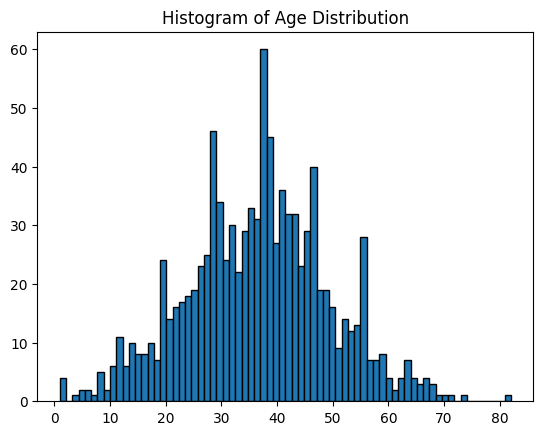

In [253]:
plt.hist(freq_ages1['observation'], bins=len(freq_ages1['observation']), weights=freq_ages1['count'], edgecolor='black')
plt.title('Histogram of Age Distribution')
plt.show()

In [254]:
ages_population.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [255]:
# your code here
ages_mean = ages_population['observation'].sum() / len(ages_population)
ages_mean

36.56

In [256]:
ages_population['observation'].std()

12.81649962597677

In [257]:
"""
I see that is the plot , data have a simetric distribuition, the mean is not so far from the median. 
and there is no big outliars.
"""

'\nI see that is the plot , data have a simetric distribuition, the mean is not so far from the median. \nand there is no big outliars.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [258]:
ages_population2 = pd.read_csv('../data/ages_population2.csv')
ages_population2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [259]:
ages_population2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [260]:
# your code here
freq_ages2 = ages_population2['observation'].value_counts().sort_index()
freq_ages21 = pd.DataFrame(freq_ages2).reset_index()
freq_ages21

,observation,count
0,19.0,3
1,20.0,13
2,21.0,17
3,22.0,35
4,23.0,41
5,24.0,78
6,25.0,98
7,26.0,120
8,27.0,125
9,28.0,139


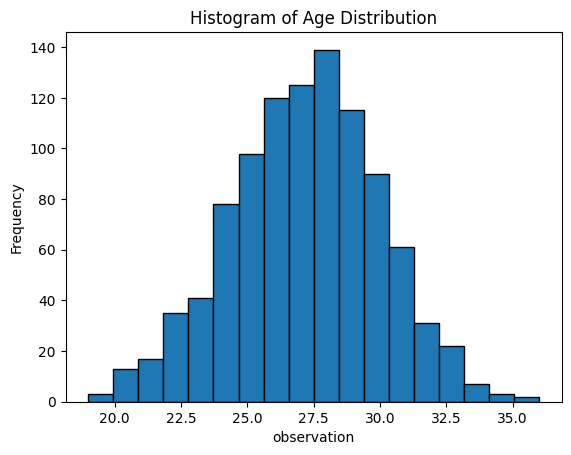

In [261]:
plt.hist(freq_ages21['observation'], bins=len(freq_ages21['observation']), weights=freq_ages21['count'], edgecolor='black')
plt.xlabel('observation')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [262]:
"""
I see that this plot, is proporcional too, but it have much less variance, 
so there is a lot of ages that repeat it self much m,ore then the preview plot.
"""

'\nI see that this plot, is proporcional too, but it have much less variance, \nso there is a lot of ages that repeat it self much m,ore then the preview plot.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [263]:
# your code here
calculate_mean(ages_population2['observation'])

27.155

In [264]:
ages_population2['observation'].std()

2.9698139326891835

In [265]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [266]:
# your code here
ages_population3 = pd.read_csv('../data/ages_population3.csv')
ages_population3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


In [267]:
freq_ages3 = ages_population3['observation'].value_counts().sort_index()
freq_ages31 = pd.DataFrame(freq_ages3).reset_index()
freq_ages31.head()


,observation,count
0,1.0,1
1,2.0,2
2,4.0,2
3,5.0,1
4,7.0,1


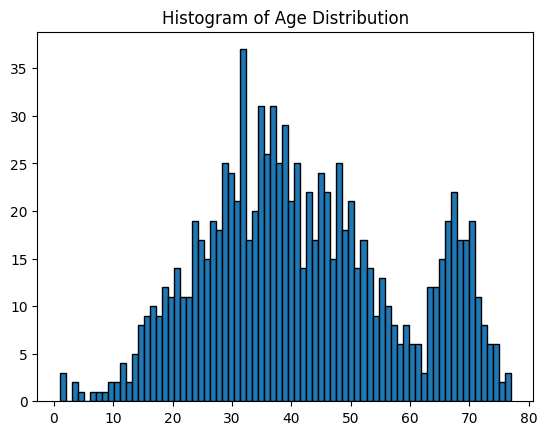

In [268]:
plt.hist(freq_ages31['observation'], bins=len(freq_ages31['observation']), weights=freq_ages31['count'], edgecolor='black')
plt.title('Histogram of Age Distribution')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [269]:
freq_ages31.shape

(75, 2)

In [270]:
calculate_mean(ages_population3['observation'])

41.989

In [271]:
# your code here
ages_population3['observation'].std()

16.14470595986593

In [272]:
ages_population3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [273]:
"""
Here we can a see that the mean is also not faar form the median , that suggest a simetrical distribuition of the data. 
the standart deviation is bigger compared wiht the other two graphics, and we can see a similar range with the first graphic
between the min, and the max, ages.
"""

'\nHere we can a see that the mean is also not faar form the median , that suggest a simetrical distribuition of the data. \nthe standart deviation is bigger compared wiht the other two graphics, and we can see a similar range with the first graphic\nbetween the min, and the max, ages.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [274]:
# your code here

calculate_quartiles(ages_population3['observation'])

(30.0, 40.0, 53.0)

In [275]:
"""

"""

'\n\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [276]:
# your code here
ages_population3['observation'].quantile(0.50)

40.0

In [277]:
"""
we can see that is balanced this graphic.
"""

'\nwe can see that is balanced this graphic.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [278]:
# your code here

In [279]:
"""
your comments here
"""

'\nyour comments here\n'